In [1]:
## loading libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

In [55]:
sns.set(rc={"figure.figsize":(15,10)})

In [3]:
data=pd.read_csv('Datasets/cleaned_data1.csv')
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,captial_gain,capital_loss,hours_per_week,native_country,income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [4]:
### Checking null values

data.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
captial_gain         0
capital_loss         0
hours_per_week       0
native_country     856
income               0
dtype: int64

### Null value handling
    - All the null values are in catergorical variables
    - So replacing them with random sample imputation

In [5]:
data.workclass.value_counts()

Private             33879
Self-emp-not-inc     3861
Local-gov            3136
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

- For this feature mode is not a good strategy because of huge missing values and data can become imbalanced.

In [6]:
data.occupation.value_counts()

Prof-specialty       6167
Craft-repair         6107
Exec-managerial      6084
Adm-clerical         5608
Sales                5504
Other-service        4919
Machine-op-inspct    3019
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1487
Tech-support         1445
Protective-serv       983
Priv-house-serv       240
Armed-Forces           15
Name: occupation, dtype: int64

In [7]:
data.native_country.value_counts()

United-States                 43810
Mexico                          947
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Guatemala                        86
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

- For this feature mode is not a good strategy because of huge missing values and data can become imbalanced.

In [8]:
df1=data.copy()


In [15]:
def random_sample_imputation(feature):
    random_sample=df1[feature].dropna().sample(df1[feature].isnull().sum())
    random_sample.index=df1[df1[feature].isnull()].index
    df1.loc[df1[feature].isnull(),feature]=random_sample

In [16]:
null_cols=['workclass','occupation','native_country']

for feature in null_cols:
    random_sample_imputation(feature)

In [17]:
df1.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
captial_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [53]:
## Comparing plot
sns.set(rc={"figure.figsize":(15,10)})
def comparing_plot(data,df1,feature):
    plt.subplot(121)
    sns.countplot(data[feature])
    plt.title('Before Handling missing values')
    plt.xticks(rotation=90)
    plt.subplot(122)
    sns.countplot(df1[feature])
    plt.title('After Handling missing values')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    

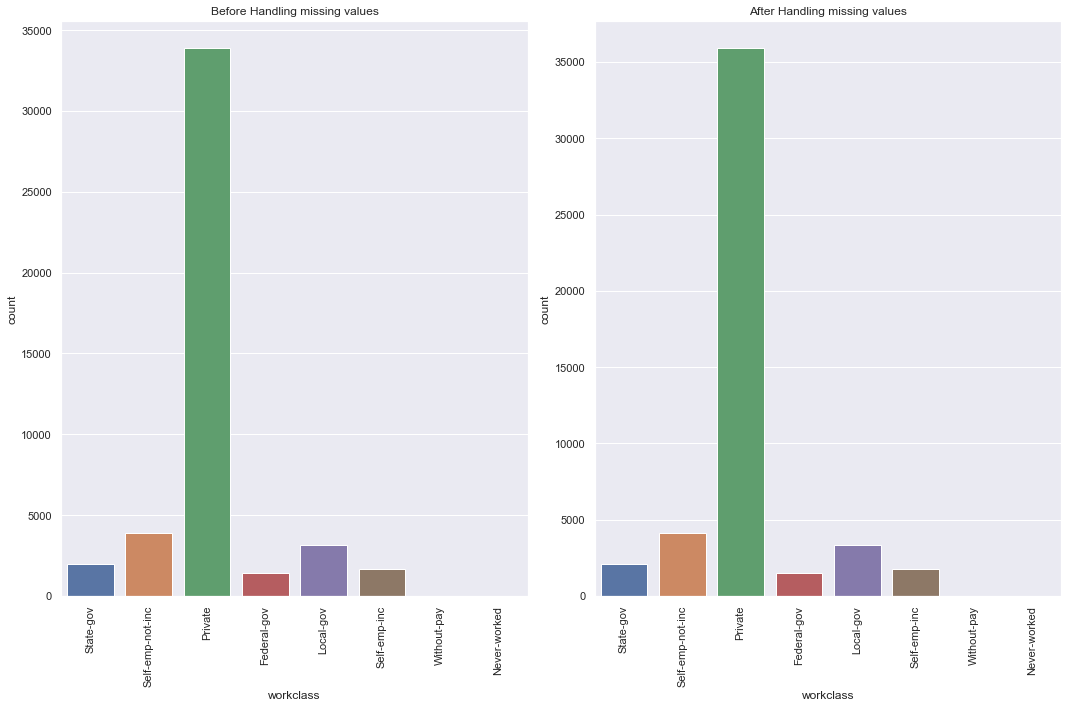

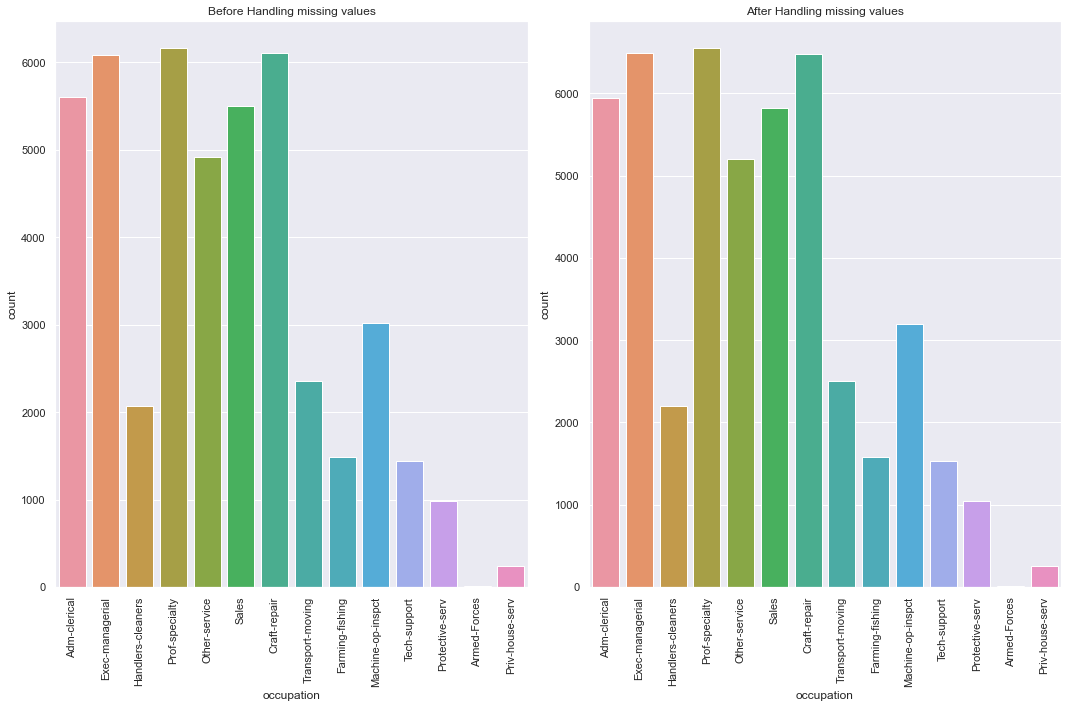

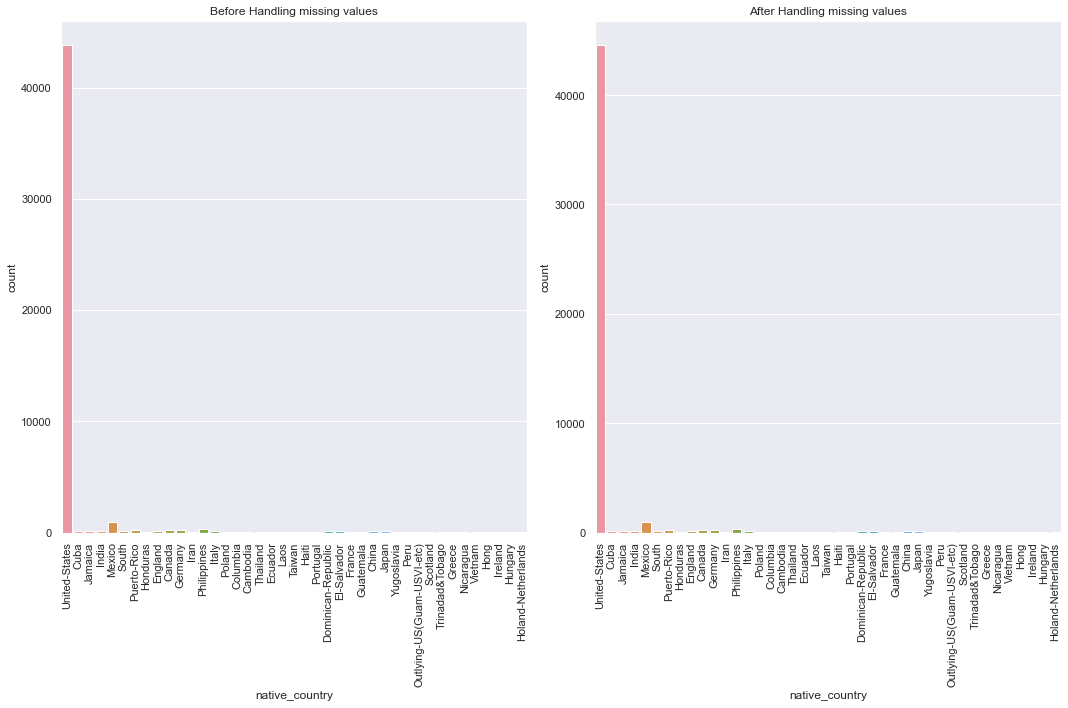

In [54]:
for feature in null_cols:
    comparing_plot(data,df1,feature)

In [28]:
comparing_plot(data,df1,)

['workclass', 'occupation', 'native_country']

In [19]:
df1.to_csv('Datasets/cleaned_data2.csv',index=False)